In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
import zipfile
with zipfile.ZipFile('./titanic.zip', 'r') as zipf:
  zipf.extractall('./')

In [6]:
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(x.dtype)

In [7]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

def sigmoid_derivative(x):
  return x * (1 - x)

In [8]:
def mse(true, predicted):
  return np.mean((true - predicted)**2)

In [9]:
def init2(S,K1,K2):
  W1 = np.array([[np.around(random.uniform(-0.1,0.1),decimals = 5) for elem in range(K1)] for x in range(S)])
  W2 = np.array([[np.around(random.uniform(-0.1,0.1),decimals = 5) for elem in range(K2)] for x in range(K1)])
  b1 = np.array([np.around(random.uniform(-1,1),decimals=5) for elem in range(K1)])
  b2 = np.array([np.around(random.uniform(-1,1),decimals = 5) for elem in range(K2)])
  return W1,W2,b1,b2

In [10]:
def forward(W1,W2,b1,b2,X):
  z1 = np.dot(X,W1) + b1
  p1 = sigmoid(z1)
  z2 = np.dot(p1,W2) + b2
  p2 = sigmoid(z2)
  return z1,p1,z2,p2

In [11]:
def backpropagation(z1,p1,z2,p2,W2,y,X):
  error = p2 - y
  delta2 = sigmoid_derivative(p2) * error
  layer2_gradient = np.dot(p1.T, delta2)
  delta1 = np.dot(delta2,W2.T) * sigmoid_derivative(p1)
  layer1_gradient = np.dot(X.T,delta1)
  d_b2 = np.sum(delta2, axis=0,)
  d_b1 = np.sum(delta1, axis=0)
  return layer1_gradient, layer2_gradient, d_b1, d_b2


In [38]:
def validate(W1,W2,b1,b2,X_val,Y_val):
  correct = 0
  for example in range(len(X_val)):
    z1,p1,z2,p2 = forward(W1,W2,b1,b2,X_val[example])
    if p2 > 0.5:
      p2 = 1
    else:
      p2 = 0
    if p2 == Y_val[example]:
      correct += 1
  return correct/len(X_val)

In [65]:
def ucz2(W1przed:np.array, W2przed:np.array,b1,b2,P, T, n):
  learning_rate = 0.1
  MSE_ERROR = []
  momentum = 0.9
  prev_v_W1, prev_v_W2, prev_v_b1, prev_v_b2 = np.zeros_like(W1przed), np.zeros_like(W2przed), np.zeros_like(b1), np.zeros_like(b2)
  for iter in range(n):
    z1,p1,z2,p2 = forward(W1przed,W2przed,b1,b2,P)
    MSE_ERROR.append(mse(T,p2))
    grad1,grad2,gradb1,gradb2 = backpropagation(z1,p1,z2,p2,W2przed,T,P)
    v_W1 = momentum * prev_v_W1 - learning_rate * grad1
    v_W2 = momentum * prev_v_W2 - learning_rate * grad2
    v_b1 = momentum * prev_v_b1 - learning_rate * gradb1
    v_b2 = momentum * prev_v_b2 - learning_rate * gradb2
    W1przed += v_W1
    W2przed += v_W2
    b1 += v_b1
    b2 += v_b2
    prev_v_W1, prev_v_W2, prev_v_b1, prev_v_b2 = v_W1,v_W2,v_b1,v_b2
  return MSE_ERROR




In [112]:
def ucz2_batch(W1przed:np.array, W2przed:np.array,b1,b2,P, T, n, batch_size = 10):
  learning_rate = 0.0001
  MSE_ERROR = []
  momentum = 0.9
  prev_v_W1, prev_v_W2, prev_v_b1, prev_v_b2 = np.zeros_like(W1przed), np.zeros_like(W2przed), np.zeros_like(b1), np.zeros_like(b2)
  for iter in range(n):
    indexes = [random.randint(0,len(P) - 1 ) for elem in range(batch_size)]
    batch_P = np.array([P[index] for index in indexes])
    batch_T = np.array([T[index] for index in indexes])
    z1,p1,z2,p2 = forward(W1przed,W2przed,b1,b2,batch_P)
    MSE_ERROR.append(mse(batch_T,p2))
    grad1,grad2,gradb1,gradb2 = backpropagation(z1,p1,z2,p2,W2przed,batch_T,batch_P)
    v_W1 = momentum * prev_v_W1 - learning_rate * grad1
    v_W2 = momentum * prev_v_W2 - learning_rate * grad2
    v_b1 = momentum * prev_v_b1 - learning_rate * gradb1
    v_b2 = momentum * prev_v_b2 - learning_rate * gradb2
    W1przed += v_W1
    W2przed += v_W2
    b1 += v_b1
    b2 += v_b2
    prev_v_W1, prev_v_W2, prev_v_b1, prev_v_b2 = v_W1,v_W2,v_b1,v_b2
  return MSE_ERROR

In [31]:
def ucz2_no_momentum(W1przed:np.array, W2przed:np.array,b1,b2,P, T, n):
  learning_rate = 0.4
  MSE_ERROR = []
  momentum = 0.9
  for iter in range(n):
    z1,p1,z2,p2 = forward(W1przed,W2przed,b1,b2,P)
    MSE_ERROR.append(mse(T,p2))
    grad1,grad2,gradb1,gradb2 = backpropagation(z1,p1,z2,p2,W2przed,T,P)
    W1przed -= learning_rate * grad1
    W2przed -= learning_rate * grad2
    b1 -= learning_rate * gradb1
    b2 -= learning_rate * gradb2
  return MSE_ERROR

In [15]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # XOR inputs
y = np.array([[0], [1], [1], [0]])


Mini-batch

Text(0, 0.5, 'MSE Loss Value')

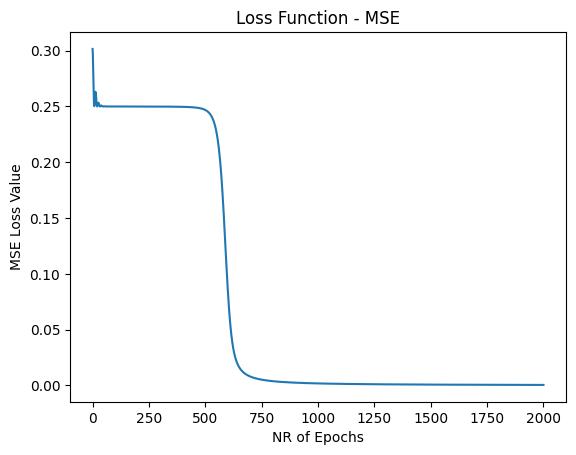

In [22]:
W1,W2,b1,b2 = init2(2,2,1)
epochs = 2000
mse_err = ucz2(W1,W2,b1,b2,X,y,epochs)
x = np.linspace(0,epochs,epochs)
plt.plot(x,mse_err)
plt.title("Loss Function - MSE")
plt.xlabel("NR of Epochs")
plt.ylabel("MSE Loss Value")

Full-batch


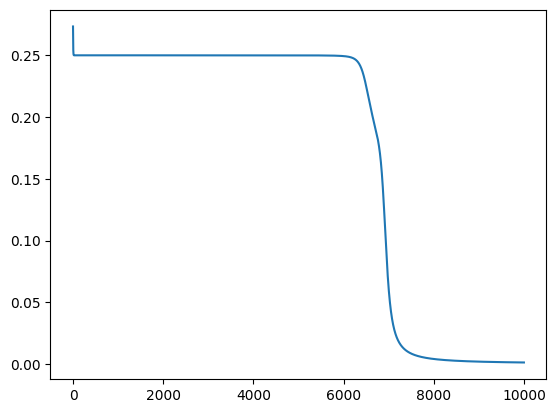

In [23]:
W1,W2,b1,b2 = init2(2,2,1)
epochs = 10000
mse_err = ucz2_no_momentum(W1,W2,b1,b2,X,y,epochs)
x = np.linspace(0,epochs,epochs)
plt.plot(x,mse_err)

Titanic

In [25]:
X_train = pd.read_csv('./trainX.csv')
Y_train = pd.read_csv('./trainY.csv')
X_train = X_train.iloc[:,1:]
Y_train = Y_train.iloc[:,1:]
X = np.array(X_train.values.tolist())
Y = np.array(Y_train.values.tolist())
X_val = pd.read_csv('./valX.csv')
Y_val = pd.read_csv('./valY.csv')
X_val = X_val.iloc[:,1:]
Y_val = Y_val.iloc[:,1:]
X_val = np.array(X_val.values.tolist())
Y_val = np.array(Y_val.values.tolist())


In [70]:
X_test = pd.read_csv('./testX.csv')
Y_test = pd.read_csv('./testY.csv')
X_test = X_test.iloc[:,1:]
Y_test = Y_test.iloc[:,1:]
X_test = np.array(X_test.values.tolist())
Y_test = np.array(Y_test.values.tolist())

Text(0, 0.5, 'MSE Loss Value')

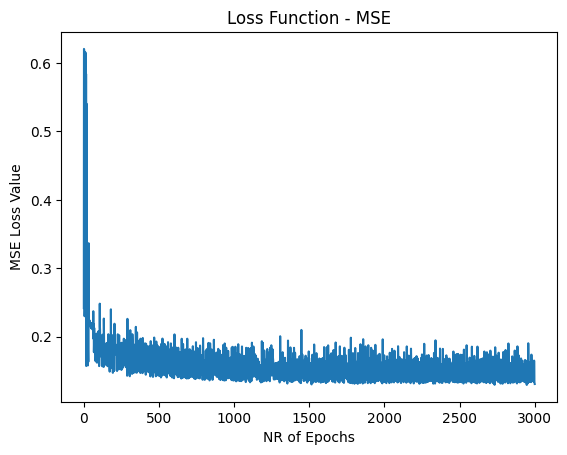

In [123]:
W1,W2,b1,b2 = init2(18,5,1)
epochs = 3000
mse_err = ucz2_no_momentum(W1,W2,b1,b2,X,Y,epochs)
x = np.linspace(0,epochs,epochs)
plt.plot(x,mse_err)
plt.title("Loss Function - MSE")
plt.xlabel("NR of Epochs")
plt.ylabel("MSE Loss Value")

In [124]:
acc = validate(W1,W2,b1,b2,X_val,Y_val)
acc

0.7415730337078652

In [125]:
test_acc = validate(W1,W2,b1,b2,X_test,Y_test)
test_acc

0.7877094972067039